In [76]:
import datetime

import numpy as np
import pandas_datareader.data as web
import yfinance as yfin
from IPython.display import VimeoVideo

yfin.pdr_override()

In [77]:
start = datetime.date(2016, 11, 16)
end = datetime.date.today()

df = web.DataReader(["TLT", "TSLA", "BTC-USD"], start, end)["Adj Close"]

[*********************100%%**********************]  3 of 3 completed


In [78]:
df.head(10)

,BTC-USD,TLT,TSLA
Date,,,
2016-11-16,744.197998,105.431709,12.262000
2016-11-17,740.976990,103.880371,12.577333
2016-11-18,751.585022,103.580383,12.334667
2016-11-19,751.616028,NaN,NaN
2016-11-20,731.026001,NaN,NaN
2016-11-21,739.247986,103.837540,12.301333
2016-11-22,751.346985,103.803223,12.744667
2016-11-23,744.593994,103.400360,12.876000
2016-11-24,740.289001,NaN,NaN


In [79]:
df.describe()

,BTC-USD,TLT,TSLA
count,2487.000000,1712.000000,1712.000000
mean,18184.105375,120.073191,120.821342
std,16143.836252,17.980689,113.577920
min,731.026001,89.809021,11.931333
25%,6514.945068,105.354683,20.723501
50%,10462.259766,111.363987,51.521999
75%,28041.408203,134.543861,225.275005
max,67566.828125,160.762741,409.970001


<AxesSubplot:xlabel='Date'>

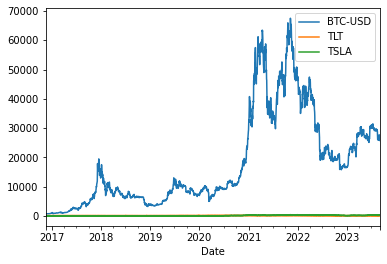

In [80]:
df.plot()

<AxesSubplot:xlabel='Date'>

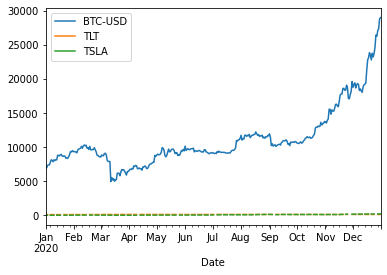

In [81]:
df["2020-01-01":"2020-12-31"].plot()

In [82]:
df = df.join(web.DataReader(["BLV"], start, end)["Adj Close"])
df.rename(columns = {"Adj Close": "BLV"}, inplace=True)
df.head()

[*********************100%%**********************]  1 of 1 completed


,BTC-USD,TLT,TSLA,BLV
Date,,,,
2016-11-16,744.197998,105.431709,12.262000,68.451958
2016-11-17,740.976990,103.880371,12.577333,67.687927
2016-11-18,751.585022,103.580383,12.334667,67.317245
2016-11-19,751.616028,NaN,NaN,NaN
2016-11-20,731.026001,NaN,NaN,NaN


In [83]:
df = df.dropna()
# Make dataframe consist of log returns
df["Bitcoin"] = np.log(df["BTC-USD"]) - np.log(df["BTC-USD"].shift(1))
df["TLT"] = np.log(df["TLT"]) - np.log(df["TLT"].shift(1))
df["Tesla"] = np.log(df["TSLA"]) - np.log(df["TSLA"].shift(1))
df = df.drop(["BTC-USD", "TSLA", "BLV"], axis = 1)
df.head()

,TLT,Bitcoin,Tesla
Date,,,
2016-11-16,NaN,NaN,NaN
2016-11-17,-0.014823,-0.004338,0.025391
2016-11-18,-0.002892,0.014215,-0.019482
2016-11-21,0.002480,-0.016551,-0.002706
2016-11-22,-0.000331,0.016234,0.035405


In [85]:
df.describe()

,TLT,Bitcoin,Tesla
count,1711.000000,1711.000000,1711.000000
mean,-0.000067,0.002082,0.001766
std,0.009695,0.046675,0.038198
min,-0.069010,-0.464730,-0.236518
25%,-0.005635,-0.016751,-0.016662
50%,0.000245,0.001917,0.001587
75%,0.005326,0.022662,0.020288
max,0.072502,0.225119,0.181445
